# "Cross-validation with multiple likelihoods"
> Alternative models and diagrams for EABM section on model comparison

- toc: true 
- author: Oriol Abril Pla
- badges: true
- categories: [arviz, model comparison]

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
az.style.use("arviz-darkgrid")
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams["axes.grid"] = False
plt.rcParams["xtick.labelbottom"] = False

In [3]:
idata = az.load_arviz_data("rugby")

## Diagram generation

In [4]:
obs = idata.observed_data
n_matches = obs.dims["match"]
teams = idata.posterior.team.values
home_team = np.array([m.split()[0] for m in obs.match.values])
away_team = np.array([m.split()[1] for m in obs.match.values])
teams = np.unique(home_team)

In [5]:
def plot_cv_matrix(cv_mat, ax, ticks=False):
    n_rows = cv_mat.shape[0]
    rows = np.arange(n_rows)
    ax.imshow(cv_mat, vmax=9, alpha=.5)
    
    # annotate results
    for row in rows:
        ax.annotate(f"{obs.home_points[row].item():.0f}", (0, row), va="center", ha="center")
        ax.annotate(f"{obs.away_points[row].item():.0f}", (1, row), va="center", ha="center")
    
    # annotate axis
    if ticks:
        ax.set_yticks(rows)
        ax.set_yticklabels(home_team)
        away_axis = ax.secondary_yaxis("right")
        away_axis.set_yticks(rows)
        away_axis.set_yticklabels(away_team);
    else:
        ax.set_axis_off()

In [7]:
def get_loo_match_matrix(idx):
    cv_matrix = np.ones((n_matches, 2))
    cv_matrix[idx, :] = 2
    return cv_matrix

def get_loo_away_matrix(idx):
    cv_matrix = np.ones((n_matches, 2))
    cv_matrix[:, 0] = 8
    cv_matrix[idx, 1] = 2
    return cv_matrix

def get_loo_goals_matrix(idx):
    cv_matrix = np.ones((n_matches, 2))
    row_idx, col_idx = np.divmod(idx, 2)
    cv_matrix[row_idx, col_idx] = 2
    return cv_matrix

def get_loo_team_matrix(idx):
    """If team excluded, exclude whole match!"""
    cv_matrix = np.ones((n_matches, 2))
    team_i = teams[idx]
    mask = (home_team == team_i) | (away_team == team_i)
    cv_matrix[mask, :] = 2
    return cv_matrix

In [8]:
n_rows = 10
n_cols = 7

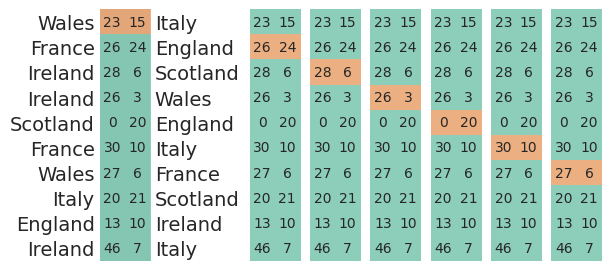

In [9]:
fig, axes = plt.subplots(1, n_cols, figsize=(6, 4), constrained_layout=True)

for i in range(n_cols):
    cv_mat_i = get_loo_match_matrix(i)
    plot_cv_matrix(cv_mat_i[:10], axes[i], ticks=i==0)

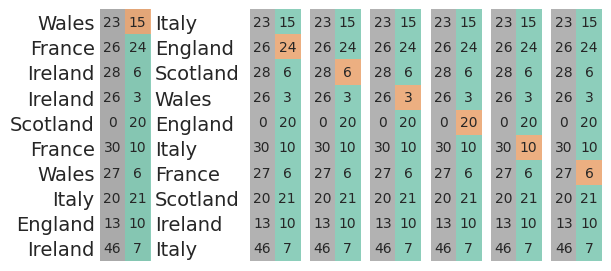

In [10]:
fig, axes = plt.subplots(1, n_cols, figsize=(6, 4), constrained_layout=True)

for i in range(n_cols):
    cv_mat_i = get_loo_away_matrix(i)
    plot_cv_matrix(cv_mat_i[:10], axes[i], ticks=i==0)

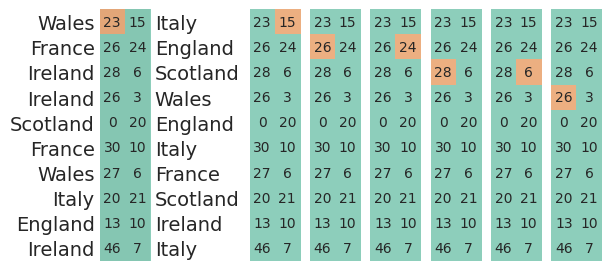

In [11]:
fig, axes = plt.subplots(1, n_cols, figsize=(6, 4), constrained_layout=True)

for i in range(n_cols):
    cv_mat_i = get_loo_goals_matrix(i)
    plot_cv_matrix(cv_mat_i[:10], axes[i], ticks=i==0)

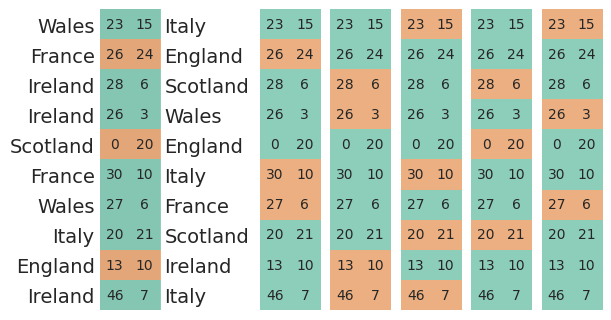

In [12]:
n_cols = teams.size
fig, axes = plt.subplots(1, n_cols, figsize=(6, 4), constrained_layout=True)

for i in range(n_cols):
    cv_mat_i = get_loo_team_matrix(i)
    plot_cv_matrix(cv_mat_i[:10], axes[i], ticks=i==0)